In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/output_elesense.csv')

adc_values = df['Data'].values

window_size = 100

def create_windows(data, window_size):
    windows = [data[i:i + window_size] for i in range(0, len(data), window_size)]
    return windows

def rms_energy(signal):
    return np.sqrt(np.mean(np.square(signal)))

def zero_crossing_rate(signal):
    return np.mean(np.diff(np.sign(signal)) != 0)

def peak_to_peak_amplitude(signal):
    return np.ptp(signal)

def variance(signal):
    return np.var(signal)

def extract_time_series_features(windows):
    features = []
    for window in windows:
        rms = rms_energy(window)
        zcr = zero_crossing_rate(window)
        p2p = peak_to_peak_amplitude(window)
        var = variance(window)
        features.append([rms, zcr, p2p, var])
    return features


windows = create_windows(adc_values, window_size)

time_series_features = extract_time_series_features(windows)

columns = ['RMS_Energy', 'Zero_Crossing_Rate', 'Peak_to_Peak_Amplitude', 'Variance']

features_df = pd.DataFrame(time_series_features, columns=columns)

features_csv_path = 'extracted_time_series_features.csv'
features_df.to_csv(features_csv_path, index=False)

print(f"Features saved to: {features_csv_path}")


Features saved to: extracted_time_series_features.csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/extracted_time_series_features.csv')

def label_peak_to_peak_amplitude(row):
    if row['Peak_to_Peak_Amplitude'] > 30:
        return 1
    else:
        return 0

df['Label'] = df.apply(label_peak_to_peak_amplitude, axis=1)

output_file_path = 'labeled_features.csv'
df.to_csv(output_file_path, index=False)

print(f"Updated CSV file saved as: {output_file_path}")


Updated CSV file saved as: labeled_features.csv


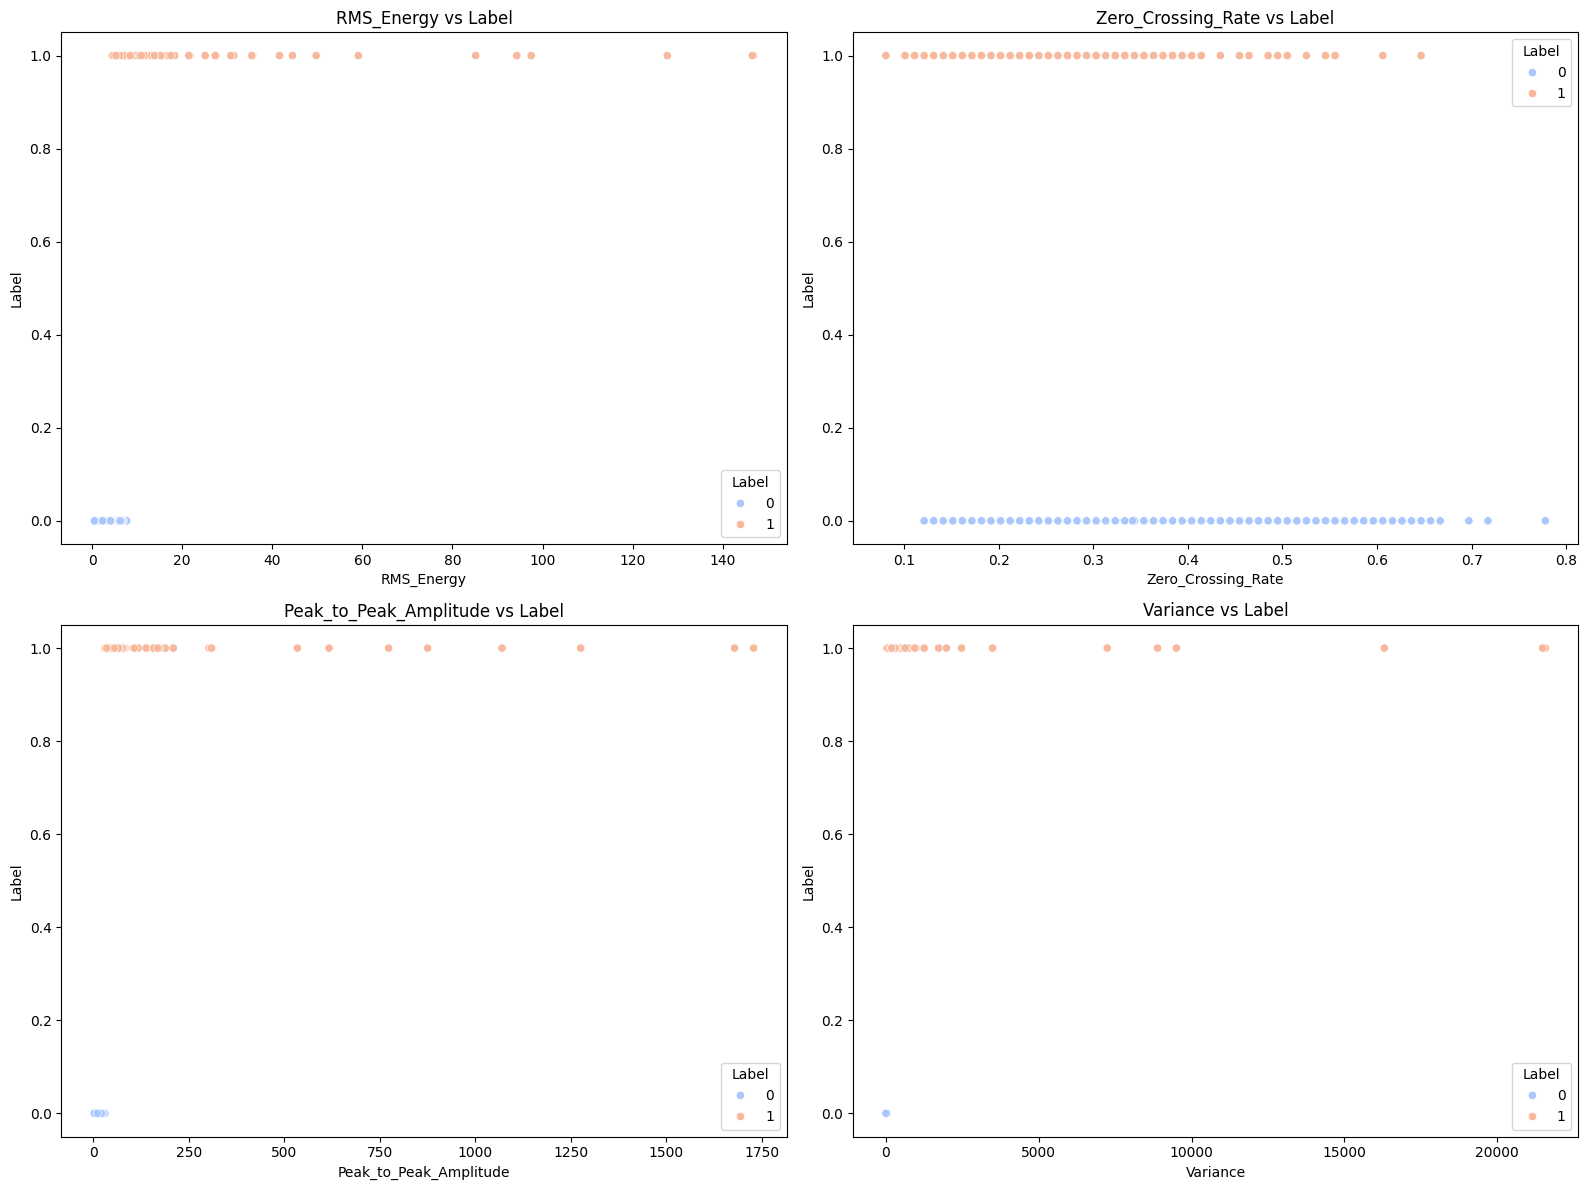

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/labeled_features.csv')

features = ['RMS_Energy', 'Zero_Crossing_Rate', 'Peak_to_Peak_Amplitude', 'Variance']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['Label'], hue=df['Label'], palette='coolwarm')
    plt.title(f'{feature} vs Label')
    plt.xlabel(feature)
    plt.ylabel('Label')

plt.tight_layout()
plt.show()


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5248 - loss: 0.7603 - val_accuracy: 0.4858 - val_loss: 0.6406
Epoch 2/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5349 - loss: 0.7103 - val_accuracy: 0.5172 - val_loss: 0.6031
Epoch 3/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5965 - loss: 0.6467 - val_accuracy: 0.6517 - val_loss: 0.5767
Epoch 4/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6102 - loss: 0.6322 - val_accuracy: 0.7429 - val_loss: 0.5576
Epoch 5/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6363 - loss: 0.6161 - val_accuracy: 0.7892 - val_loss: 0.5428
Epoch 6/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6881 - loss: 0.5762 - val_accuracy: 0.8236 - val_loss: 0.5307
Epoch 7/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7363 - loss: 0.5739 - val_accuracy: 0.8445 - val_loss: 0.5193
Epoch 8/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7579 - loss: 0.5748 - val_accuracy: 0.8595 - val_

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Accuracy: 95.96%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       338
           1       0.93      0.99      0.96       331

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



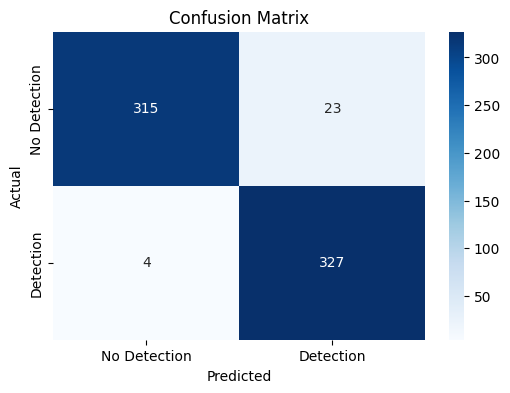

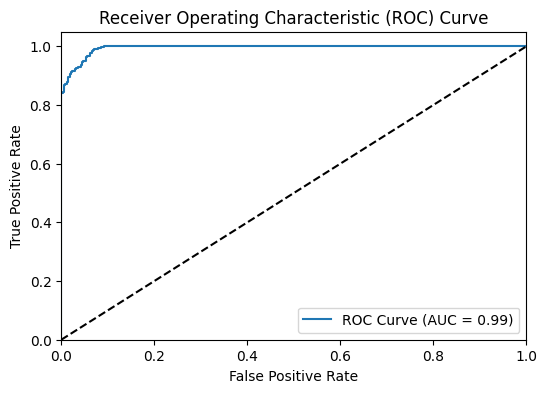

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/labeled_features.csv')

X = df.drop('Label', axis=1).values
y = df['Label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=4, validation_data=(X_test, y_test))

model.save('model.h5')
joblib.dump(scaler, 'scaler.pkl')

y_pred_prob = model.predict(X_test)

threshold = 0.5
y_pred_new = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_new)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred_new)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Detection", "Detection"], yticklabels=["No Detection", "Detection"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
import tensorflow as tf

model = tf.keras.models.load_model("model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmphtvrfm1x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer_12')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132663511413008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663511407728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663494743968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663494742384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663494528336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663494538192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663504826112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132663504825056: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [54]:
import numpy as np
import pandas as pd
import joblib
import tflite_runtime.interpreter as tflite
from sklearn.metrics import classification_report, accuracy_score

# Load the scaler
scaler = joblib.load("scaler.pkl")

# Load the TFLite model and allocate tensors
interpreter = tflite.Interpreter(model_path="model.tflitec")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def classify(features):
    # Prepare and scale input data
    input_data = np.array(features, dtype=np.float32).reshape(1, -1)
    scaled_data = scaler.transform(input_data)

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], scaled_data)

    # Invoke the interpreter
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = output_data[0][0]
    return prediction

def manual_input_and_classify():
    print("Please enter the following features:")
    rms = float(input("RMS Energy: "))
    zcr = float(input("Zero Crossing Rate: "))
    p2p = float(input("Peak-to-Peak Amplitude: "))
    var = float(input("Variance: "))

    # Create a feature array
    features = [rms, zcr, p2p, var]

    # Classify based on the manually entered features
    prediction = classify(features)
    if prediction > 0.5:
        print(f"Elephant detected with confidence {prediction:.2f}")
    else:
        print(f"No elephant detected, confidence {prediction:.2f}")

def evaluate_model(csv_file_path):
    # Load the CSV file
    df = pd.read_csv(csv_file_path)

    # Separate features and labels
    X = df[['RMS_Energy', 'Zero_Crossing_Rate', 'Peak_to_Peak_Amplitude', 'Variance']].values
    y_true = df['Label'].values

    # Make predictions
    y_pred = []
    for features in X:
        prediction = classify(features)
        # Apply threshold to get binary prediction
        y_pred.append(1 if prediction > 0.5 else 0)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Classification Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

if __name__ == "__main__":
    # Manual input mode
    manual_input_and_classify()

    # Automated CSV evaluation
    csv_file_path = '/content/labeled_features.csv'  # Replace with your CSV file path
    evaluate_model(csv_file_path)


Please enter the following features:
RMS Energy: 1.85
Zero Crossing Rate: 0.45
Peak-to-Peak Amplitude: 9
Variance: 3.44
No elephant detected, confidence 0.37
Classification Accuracy: 93.99%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      1114
           1       0.75      0.98      0.85       234

    accuracy                           0.94      1348
   macro avg       0.87      0.96      0.91      1348
weighted avg       0.95      0.94      0.94      1348



In [33]:
pip install tflite-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import joblib
from sklearn.metrics import classification_report, accuracy_score


model = tf.keras.models.load_model("model.h5")
scaler = joblib.load("scaler.pkl")

def evaluate_model(csv_file_path):

    df = pd.read_csv(csv_file_path)

    X = df[['RMS_Energy', 'Zero_Crossing_Rate', 'Peak_to_Peak_Amplitude', 'Variance']].values
    y_true = df['Label'].values

    X_scaled = scaler.transform(X)

    y_pred_prob = model.predict(X_scaled).flatten()

    threshold = 0.5
    y_pred = (y_pred_prob >= threshold).astype(int)


    accuracy = accuracy_score(y_true, y_pred)
    print(f"Classification Accuracy: {accuracy * 100:.2f}%")

    report = classification_report(y_true, y_pred)
    print("\nClassification Report:\n", report)

csv_file_path = '/content/labeled_features.csv' 
evaluate_model(csv_file_path)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Accuracy: 88.20%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1114
           1       0.61      0.92      0.73       234

    accuracy                           0.88      1348
   macro avg       0.79      0.90      0.83      1348
weighted avg       0.92      0.88      0.89      1348



In [14]:
pip install tflite_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.3 MB/s eta 0:00:00
